In [1]:
import pandas as pd

In [62]:
#set RUL as target
def get_rul(mydata,label):
    from sklearn import preprocessing
    mydata=pd.merge(mydata,
             mydata.groupby('Asset id').size().reset_index(),on='Asset id',how='left')
    mydata['RUL']=mydata[0]-mydata['runtime']
    y=mydata[label]
    X=mydata.drop(columns=[0,'RUL','Asset id','runtime'])
    return mydata,X,y

In [98]:
# mapping RUL into 1 and 0, 1:RUL<20, 0:RUL>=20
def get_label(mydata,label):
    from sklearn import preprocessing
    mydata=pd.merge(mydata,
             mydata.groupby('Asset id').size().reset_index(),on='Asset id',how='left')
    mydata['RUL']=mydata[0]-mydata['runtime']
    mydata[label]=0
    mydata.loc[mydata['RUL']<=20,label]=1
    y=mydata[label]
    X=mydata.drop(columns=['y',0,'RUL','Asset id','runtime'])
    return mydata,X,y

# Loading data

In [127]:
training_set=pd.read_csv('./data/PM_train.csv')
testing_set=pd.read_csv('./data/PM_test.csv')

###  Calculate RUL and set RUL as target

In [99]:
train_all,X_train,y_train=get_rul(training_set,'RUL')
test_all,X_test,y_test=get_rul(testing_set,'RUL')

### Mapping RUL to binary data, predict whether it will fail within 20 round

In [128]:
train_all,X_train,y_train=get_label(training_set,'y')
test_all,X_test,y_test=get_label(testing_set,'y')

# Data Exploration

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fef7b5e48>,
      dtype=object)

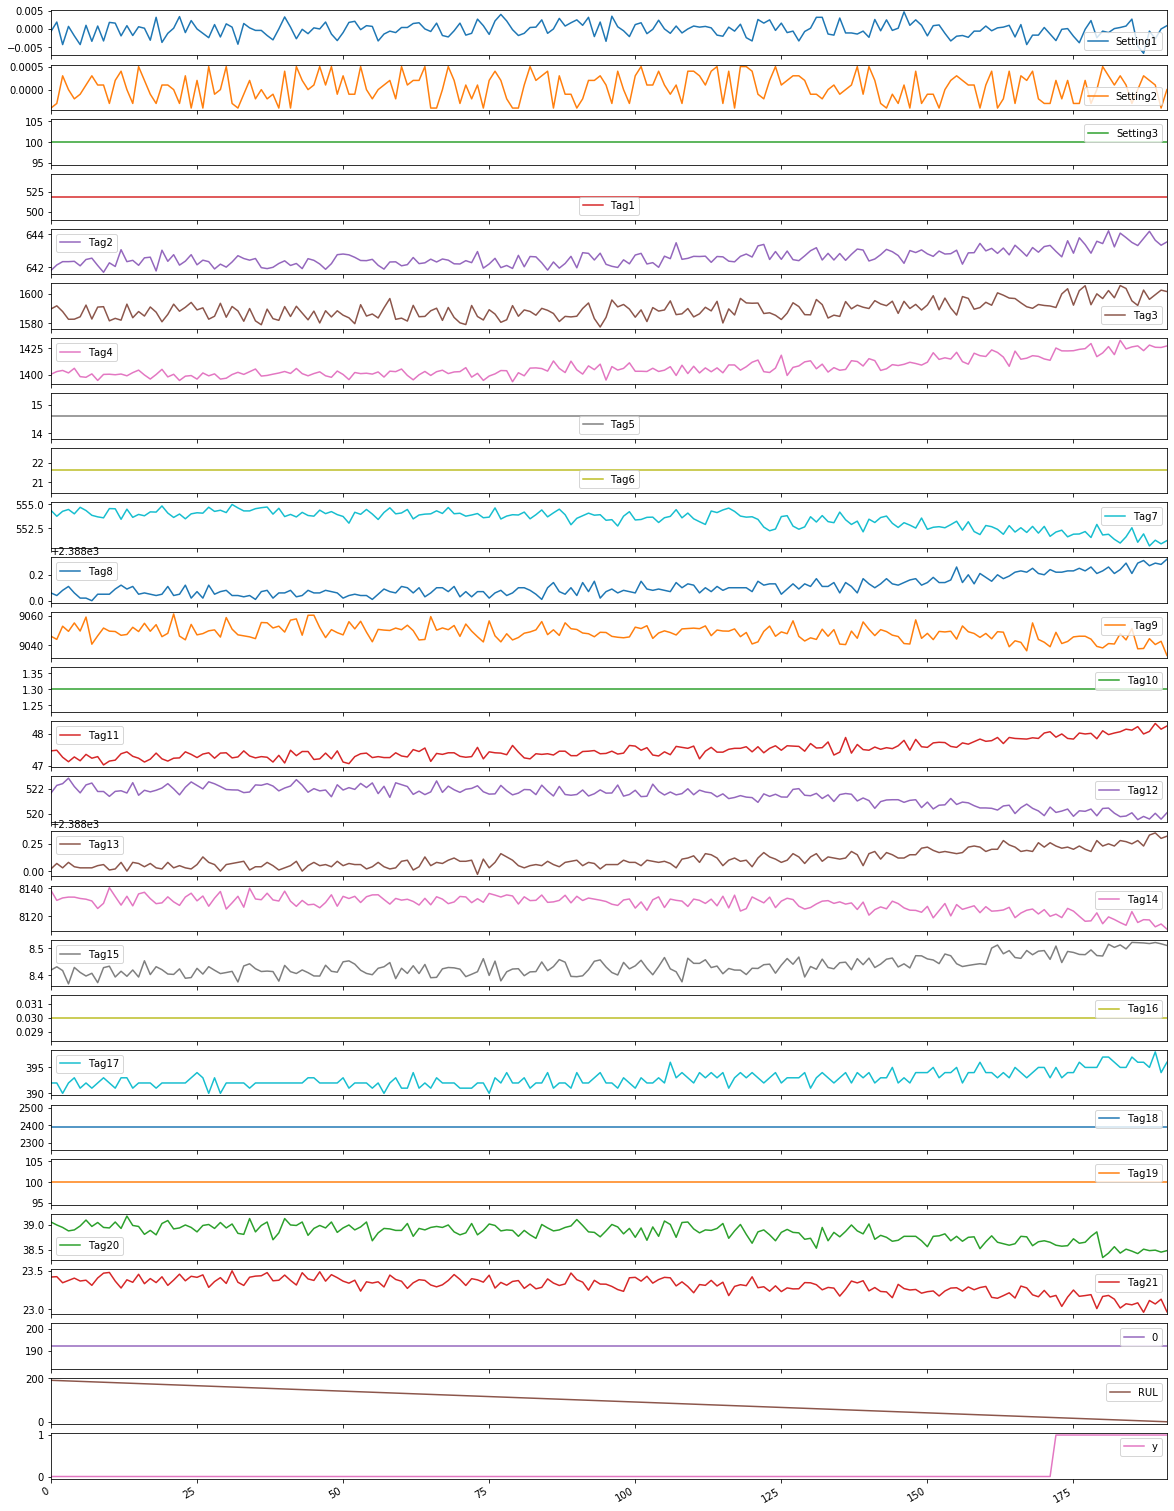

In [29]:
### plotting sensor data for engine ID
engine_id = train_all[train_all['Asset id'] == 1]
engine_id[train_all.columns[2:]].plot(subplots=True
                                      , sharex=True
                                      , figsize=(20,30)
                                     )

In [10]:
X_train

,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,...,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,cycle_norm
0,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,...,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,0.000000
1,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,...,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,0.002770
2,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,...,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,0.005540
3,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,...,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,0.008310
4,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,...,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,0.011080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.477011,0.250000,0.0,0.0,0.686747,0.587312,0.782917,0.0,1.0,0.254428,...,0.558824,0.194344,0.656791,0.0,0.750000,0.0,0.0,0.271318,0.109500,0.540166
20627,0.408046,0.083333,0.0,0.0,0.701807,0.729453,0.866475,0.0,1.0,0.162641,...,0.500000,0.188668,0.727203,0.0,0.583333,0.0,0.0,0.124031,0.366197,0.542936
20628,0.522989,0.500000,0.0,0.0,0.665663,0.684979,0.775321,0.0,1.0,0.175523,...,0.529412,0.212148,0.922278,0.0,0.833333,0.0,0.0,0.232558,0.053991,0.545706
20629,0.436782,0.750000,0.0,0.0,0.608434,0.746021,0.747468,0.0,1.0,0.133655,...,0.514706,0.203065,0.823394,0.0,0.583333,0.0,0.0,0.116279,0.234466,0.548476


In [32]:
X_train.describe()

,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,...,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21
count,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


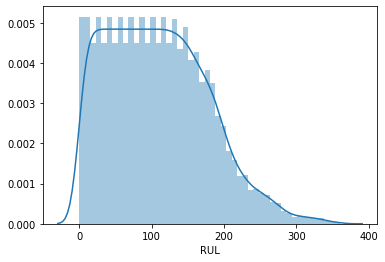

In [140]:
#RUL distribution
sns.distplot(train_all['RUL']);

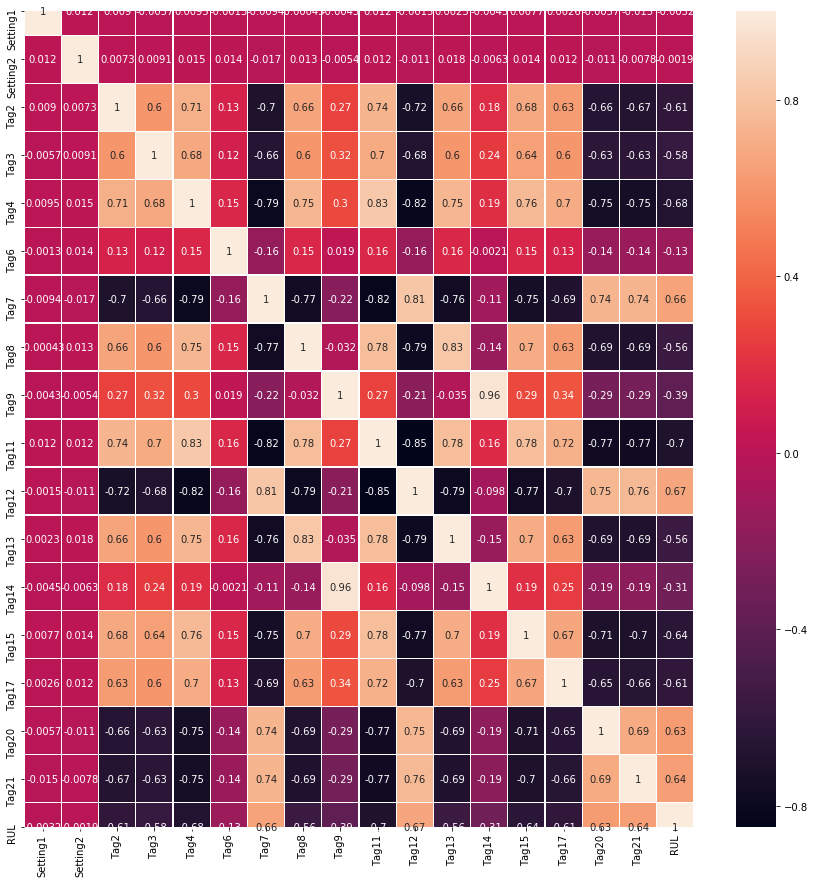

In [47]:
import seaborn as sns
df_corr=train_all[['Setting1', 'Setting2', 'Tag2', 'Tag3', 'Tag4', 'Tag6', 'Tag7', 'Tag8',
       'Tag9', 'Tag11', 'Tag12', 'Tag13', 'Tag14', 'Tag15', 'Tag17', 'Tag20',
       'Tag21','RUL']].corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_corr, linewidths=.2, annot=True)

In [173]:
train_all[0].drop_duplicates().describe()

count     66.000000
mean     212.075758
std       52.114758
min      128.000000
25%      175.000000
50%      200.500000
75%      238.500000
max      362.000000
Name: 0, dtype: float64

In [174]:
test_all[0].drop_duplicates().describe()

count     80.000000
mean     133.000000
std       56.650829
min       31.000000
25%       88.750000
50%      136.500000
75%      168.750000
max      303.000000
Name: 0, dtype: float64

In [38]:
#drop columns with 0 variance
constant_column=X_train.columns[X_train.nunique() <= 1].to_list()
X_train.drop(columns=constant_column,inplace=True)
X_test.drop(columns=constant_column,inplace=True)

In [13]:
from sklearn import preprocessing
test=pd.read_csv('test.csv')
y_test=test['y']
mydata=test
mydata['cycle_norm'] = mydata['runtime']
cols_normalize = mydata.columns.difference(['Asset id','runtime','RUL','y'])


norm_mydata = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(mydata[cols_normalize]), 
                            columns=cols_normalize, 
                            index=mydata.index)
data_all = mydata[mydata.columns.difference(cols_normalize)].join(norm_mydata)
mydata = data_all.reindex(columns = mydata.columns)
mydata = mydata.reset_index(drop=True)
X_test=mydata.drop(columns=['y','RUL','Asset id','runtime'])

/home/yc/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Data Modeling

# 1. Use Random Forest Classifier to predict 0,1 label

In [16]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score

1. find the best # of estimators

0.9725168105829173 171


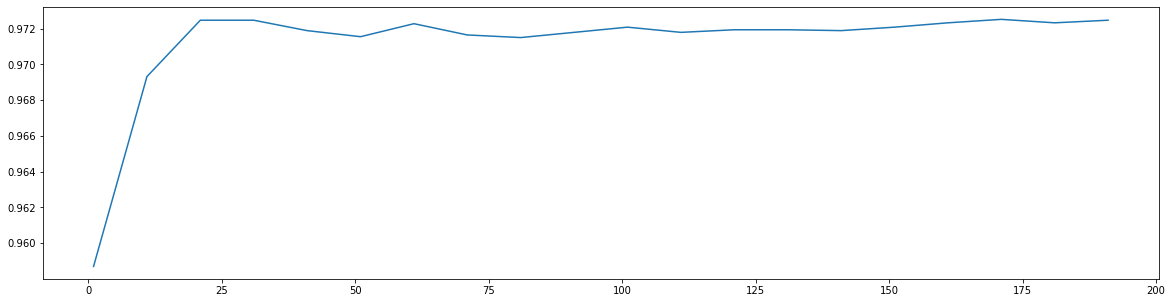

In [109]:
scorel = []
for i in range(1,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                # n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

2. use grid search to find the best max depth

In [139]:
param_grid = {'max_depth':np.arange(1, 5, 1)}
 
rfc = RandomForestClassifier(n_estimators=30
                             ,random_state=90
                            )
#Grid Search
GS = GridSearchCV(rfc,param_grid,scoring='f1',cv=10)
GS.fit(X_train,y_train)
 
GS.best_params_

{'max_depth': 4}

In [140]:
 
GS.best_score_

0.8424731392685321

In [134]:
pd.DataFrame(GS.predict(X_test))

,0
0,0
1,0
2,0
3,0
4,0
...,...
13091,0
13092,0
13093,0
13094,0


# 1. Use Xgboost regressor to predict RUL (continuous)

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from time import time
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,f1_score
import xgboost as xgb

In [154]:
train_all,X_train,y_train=get_rul(training_set,'RUL')
test_all,X_test,y_test=get_rul(testing_set,'RUL')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [155]:
df_train=xgb.DMatrix(X_train,y_train)
df_test=xgb.DMatrix(X_test,y_test)

### Cross Validataion (5-Fold)
### 1. find the best # of round

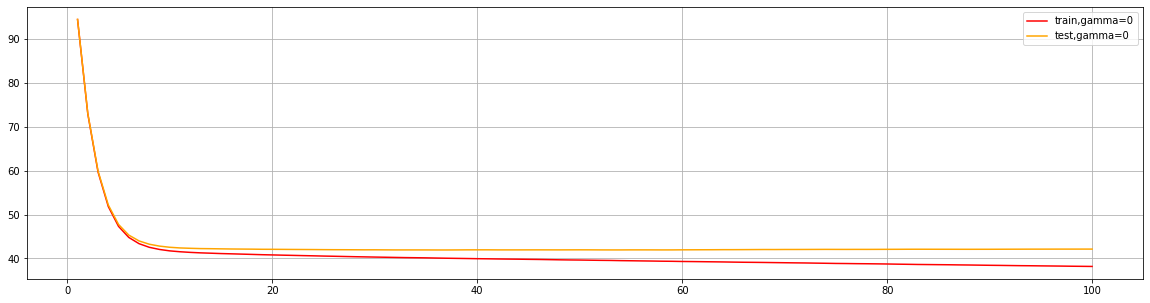

In [85]:
param1 = {'silent':True,'obj':'reg:linear',"gamma":0,"eta":0.31,'max_depth':3}
num_round = 100
n_fold=5 #sklearn - KFold

cvresult1 = xgb.cv(param1, df_train, num_round,n_fold)

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,num_round+1),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,num_round+1),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

### 2. find the best # of estimators

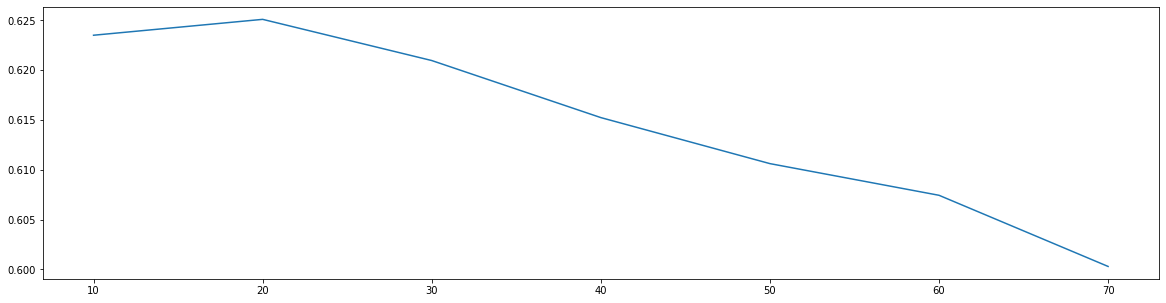

In [80]:
e=[]
evala=[]
i=0
eva='train'
for  eta in [i/100.0 for i in range(10,80,10)]:
    for max_depth in [3]:
            param2 = {'silent':True,'obj':'reg:linear'
                      ,"gamma":0
                      ,"eta":eta
                      ,'max_depth':max_depth,'booster':'dart'}
            bst=xgb.train(param2, df_train, 50)
            ypreds = bst.predict(df_test)
            e.append(eta)
            evala.append(r2_score(y_test,ypreds))
plt.figure(figsize=[20,5])
plt.plot(range(10,80,10),evala)
plt.show()

### 3.Find the best booster and max depth

In [102]:
max_d=[]
i=0
eva='train'

for max_depth in [2,3,4]:
    for booster in ['dart','gbtree','gblinear']:
            param2 = {'silent':True,'obj':'reg:linear'
                      ,"gamma":0
                      ,"eta":0.2
                      ,'max_depth':max_depth,'booster':booster}
            bst=xgb.train(param2, df_train, 50)
            ypreds = bst.predict(df_test)
            max_d.append(max_depth)
            print(booster,":","max_depth",max_depth,r2_score(y_test,ypreds))

dart : max_depth 2 0.6195736638821095
gbtree : max_depth 2 0.6195736642889005
gblinear : max_depth 2 -0.0024991520830470737
dart : max_depth 3 0.6250956739732001
gbtree : max_depth 3 0.6250956739515428
gblinear : max_depth 3 -0.0024870789882391886
dart : max_depth 4 0.6248019341256964
gbtree : max_depth 4 0.6248019373238367
gblinear : max_depth 4 -0.0025008243329860402


In [147]:
param_final={'silent':True,'obj':'reg:linear'
                      ,"gamma":0
                      ,"eta":0.2
                      ,'max_depth':3,'booster':'gbtree'}
bst=xgb.train(param_final, df_train, 50)
ypreds = bst.predict(df_test)

In [148]:
pd.DataFrame(zip(ypreds,y_test))

,0,1
0,124.656189,135
1,10.129141,2
2,172.914261,217
3,3.416459,0
4,140.485764,178
...,...,...
4122,186.148605,184
4123,98.407219,103
4124,109.778809,121
4125,115.801743,104


In [150]:
print('r2 score is',r2_score(y_test,ypreds))

r2 score is 0.6250956739515428


# Feature importance

In [151]:
pd.DataFrame(list(bst.get_fscore().items()),columns = ['variables','fscore']).sort_values(by='fscore',ascending=False)

,variables,fscore
5,Tag14,49
1,Tag9,39
0,Tag11,37
2,Tag4,27
3,Tag12,24
13,Tag13,24
12,Tag3,22
11,Tag8,18
9,Tag2,15
8,Tag21,15


In [153]:
pd.DataFrame(list(bst.get_fscore().items()),columns = ['variables','fscore']).sort_values(by='fscore',ascending=False).to_csv('feature_importance.csv')

In [156]:
ypreds = bst.predict(df_test)

In [159]:
pd.DataFrame(ypreds).to_csv('prediction.csv',index=False)